In [1]:
import pandas as pd 
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('/content/dataset_q2_q4.csv')
df.head(-1)

,x1,x2,x3,y_label
0,-100.838182,100.000000,0.000000,-6.908485e+06
1,-98.826004,101.202405,0.901804,-7.167624e+06
2,-98.627987,102.404810,1.803607,-7.429470e+06
3,-96.960173,103.607214,2.705411,-7.699765e+06
4,-97.190325,104.809619,3.607214,-7.972486e+06
...,...,...,...,...
494,295.375742,693.987976,445.490982,1.197644e+09
495,294.786321,695.190381,446.392786,1.206979e+09
496,296.056099,696.392786,447.294589,1.216369e+09
497,297.526847,697.595190,448.196393,1.225805e+09


In [3]:
X=df[['x1','x2','x3']]
y=df[['y_label']]

# Q2

## Q2_1

In [4]:
class linear_Regression:
  def __init__(self,x,y,lr,epochs) :
    self.x=torch.from_numpy(x.to_numpy()).float()
    self.y=torch.from_numpy(y.to_numpy()).float()
    self.lr=lr
    self.epochs=epochs
    self.cost_hist=[0]*epochs
    self.final_theta=None
    self.b=0
    self.x_test=None
    self.y_test=None
  def add_ons_columns(self):
    self.x=torch.cat([torch.ones((self.x.shape[0],), dtype=torch.float32).unsqueeze(1), self.x], dim=1)
  def split_dataset(self, test_per=0.4):
        X_train, X_test, y_train, y_test = train_test_split(self.x, self.y, test_size=test_per)
        return X_train, X_test, y_train, y_test
  def mse_loss(self,predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ (2*difference.numel())
  def fit(self):
    self.add_ons_columns()
    x_train, self.x_test, y_train, self.y_test=self.split_dataset()
    cost_hist=[0]*self.epochs
    theta = torch.randn(1, self.x.shape[1], requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    for i in range(self.epochs):
      preds = x_train @ theta.t() +b
      loss = self.mse_loss(preds, y_train)
      loss.backward()
       
      with torch.no_grad():
          theta -= theta.grad *1e-6
          b-=b.grad*1e-6 
          theta.grad.zero_()
          b.grad.zero_()
      print(f"Epoch {i}/{self.epochs}: Loss: {loss}")
      cost_hist[i]=loss.detach().numpy()
    self.cost_hist=cost_hist 
    self.final_theta=theta
    self.b=b
    
  def plot(self):
    iters = [i for i in range(1500)]
    plt.plot(iters, self.cost_hist, 'g')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
  def predict(self,x):
    return x @ self.final_theta.t() +self.b

In [5]:
model=linear_Regression(X,y,0.01,1500)

In [6]:
model.fit()

Epoch 0/1500: Loss: 9.694895674281165e+16
Epoch 1/1500: Loss: 6.478076409230131e+16
Epoch 2/1500: Loss: 4.873529885039002e+16
Epoch 3/1500: Loss: 4.070072929956659e+16
Epoch 4/1500: Loss: 3.664677838834893e+16
Epoch 5/1500: Loss: 3.457105290644685e+16
Epoch 6/1500: Loss: 3.347867736683315e+16
Epoch 7/1500: Loss: 3.287536760573133e+16
Epoch 8/1500: Loss: 3.251553524567245e+16
Epoch 9/1500: Loss: 3.227714952835891e+16
Epoch 10/1500: Loss: 3.209958913789133e+16
Epoch 11/1500: Loss: 3.1952735616106496e+16
Epoch 12/1500: Loss: 3.182160382210867e+16
Epoch 13/1500: Loss: 3.169875057757389e+16
Epoch 14/1500: Loss: 3.1580490800562176e+16
Epoch 15/1500: Loss: 3.1464969065201664e+16
Epoch 16/1500: Loss: 3.135126195352371e+16
Epoch 17/1500: Loss: 3.123891849396224e+16
Epoch 18/1500: Loss: 3.112770890576691e+16
Epoch 19/1500: Loss: 3.10175021924352e+16
Epoch 20/1500: Loss: 3.090824037190861e+16
Epoch 21/1500: Loss: 3.079988693696512e+16
Epoch 22/1500: Loss: 3.0692431150186496e+16
Epoch 23/1500: Los

# plot the loss on **traning** 

No handles with labels found to put in legend.


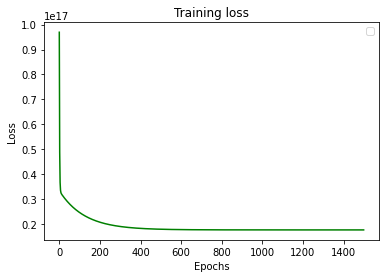

In [7]:
model.plot()

In [8]:
sample=torch.from_numpy( np.array([1,300.037521	,698.797595	,449.098196	])).float()

In [9]:
pred=model.predict(model.x_test)

In [10]:
model.mse_loss(pred,model.y_test)

tensor(1.7982e+16, grad_fn=<DivBackward0>)

## **Q2_2**

In [11]:
class linear_regression:
    
    def __init__(self, X,y, lr, epochs):
        self.X=X
        self.y=y
        self.lr = lr
        self.epochs = epochs 
        
    # Add column of ones to X to represent x0
    def concatenate_X0_with_X(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        return X
    
    
    def split_dataset(self, test_percentage=0.4):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_percentage)
        return X_train, X_test, y_train, y_test
        
    def normalize(self, X):
        X = (X - X.mean(axis =0)) / X.std(axis =0)
        return X

     
    def predict(self, X, theta):
        return np.dot(X, theta.T)
    
    def cost_function(self, X_train, y_train, theta):
        m = y_train.size
        preds = np.dot(X_train, theta.T)
        err = preds - y_train
        cost = 1/(2*m) * np.dot(err.T, err)
        return cost, err

    def fit(self, X_train, y_train):
        theta = np.zeros(X_train.shape[1])
        cost_history = np.zeros(self.epochs)
        
        m = X_train.shape[0]
        for i in range(self.epochs):
            preds = np.dot(X_train, theta.T)
            cost, err = self.cost_function(X_train, y_train, theta)
            theta = theta - ((self.lr/m) * np.dot(X_train.T, err))
            cost_history[i] = cost  
        
        return theta, cost_history
        
    def mean_squared_error(self,y_true, y_pred):
        return np.sum((y_true - y_pred)**2)/(2*y_true.size)

No handles with labels found to put in legend.


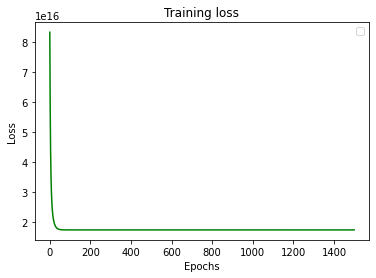

Mean Squared Error for training data is  1.7347684618849716e+16
Mean Squared Error for testing data is  1.8004885233610296e+16


In [12]:
y=np.array(y).reshape((500, ))
 
model = linear_regression(X, y, 0.05, 1500)
X_train, X_test, y_train, y_test = model.split_dataset(test_percentage = 0.4)
X_train = model.normalize(X_train)
X_test = model.normalize(X_test) 
X_train = model.concatenate_X0_with_X(X_train)
X_test = model.concatenate_X0_with_X(X_test)
theta, cost_history = model.fit(X_train, y_train)

 
iters = [i for i in range(1500)]
plt.plot(iters, cost_history, 'g')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_train = model.predict(X_train,theta)
y_pred_test = model.predict(X_test, theta)

# calculate mean_squared_error
print("Mean Squared Error for training data is ", model.mean_squared_error(y_pred_train, y_train))
print("Mean Squared Error for testing data is ", model.mean_squared_error(y_pred_test, y_test))

#               Q3

In [13]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
def train(model,model_name,X_tra,X_tes,y_tra,y_tes):
    model.fit(X_tra,y_tra)
    predictions=model.predict(X_tes)
    print(model_name)
    print('MSE -> ',mean_squared_error(predictions,y_test))
    return mean_squared_error(predictions,y_test)
model1 =LinearRegression()
model2=Ridge()
model3=Lasso()
 
models=[model1,model2,model3]
score=[]
for model in models:
    score.append(train(model,model,X_train,X_test,y_train,y_test))    

LinearRegression()
MSE ->  3.934938109765344e+16
Ridge()
MSE ->  3.935056103511579e+16
Lasso()
MSE ->  3.982240756053809e+16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.813e+18, tolerance: 4.225e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


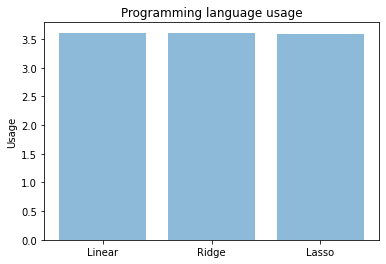

In [21]:
objects = ('Linear','Ridge','Lasso')
y_pos = np.arange(len(objects))
performance = [3.611780775826994 ,3.611547205305731,3.584949143555101]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [24]:
poly_features = poly.fit_transform(X.to_numpy().reshape(-1, 3))

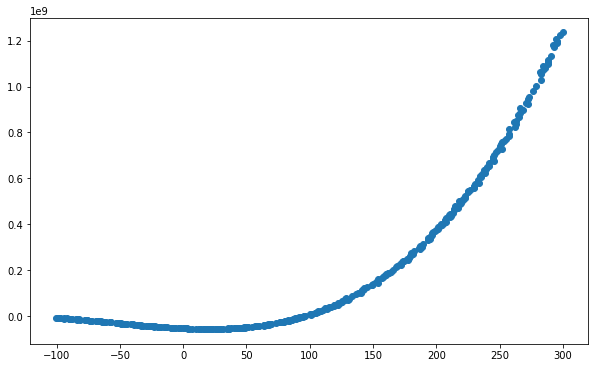

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X_train.x1, y_train)
plt.show()

In [26]:
poly_reg_model = LinearRegression()

In [27]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [39]:
y_predicted = poly_reg_model.predict(poly_features)


In [40]:
mean_squared_error(y,y_predicted)

5.817642853090349e-13

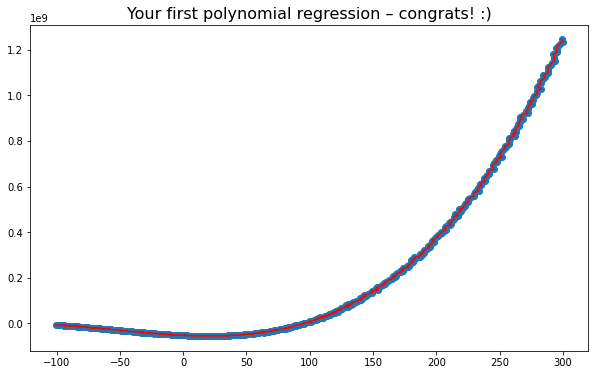

In [99]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(X.x1, y)
plt.plot(X.x1, y_predicted, c="red")
plt.show()

#Q4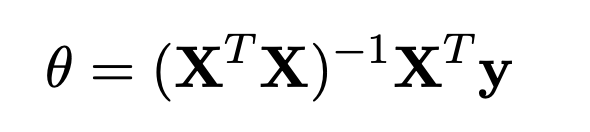

In [102]:
 
def add_ones(X):
    x_0 = torch.ones((X.shape[0],), dtype=torch.float32).unsqueeze(1)
    X = torch.cat([x_0, X], dim=1)
    return X
def normal_eq(X, y):
    X = add_ones(X)  
    Xt_X = X.T.mm(X)
    Xt_X_inv = Xt_X.inverse()
    Xt_y = X.T.mm(y)
    theta = Xt_X_inv.mm(Xt_y)
    return theta
def prediction(X, theta):
    X = add_ones(X)
    return X.mm(theta)